In [1]:
#1)Install additional libraries
!pip install xgboost nltk scikit-learn pandas

In [18]:
#2: Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, precision_recall_curve)
from sklearn.preprocessing import LabelEncoder, label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Added this line

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
#3: Load data and clean reviewText
# Raw data as a list of dicts
data = [
    {'reviewText': 'Not much to write about here, but it does exac...', 'Overall': 5},
    {'reviewText': 'The product does exactly as it should and is q...', 'Overall': 4},
    {'reviewText': 'The primary job of this device is to block the...', 'Overall': 3},
    {'reviewText': 'Nice windscreen protects my MXL mic and preven...', 'Overall': 5},
    {'reviewText': 'This pop filter is great. It looks and perform...', 'Overall': 4},
    {'reviewText': 'So good that I bought another one. Love the h...', 'Overall': 4},
    {'reviewText': 'I have used monster cables for years, and with...', 'Overall': 5},
    {'reviewText': 'I now use this cable to run from the output of...', 'Overall': 5},
    {'reviewText': 'Perfect for my Epiphone Sheraton II. Monster ...', 'Overall': 3},
    {'reviewText': 'Monster makes the best cables and a lifetime w...', 'Overall': 4}
]

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Text cleaning function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and stem
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    cleaned_tokens = [ps.stem(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(cleaned_tokens)

# Apply cleaning
df['cleaned_review'] = df['reviewText'].apply(clean_text)
print("\nCleaned DataFrame:")
print(df[['cleaned_review', 'Overall']])

Original DataFrame:
                                          reviewText  Overall
0  Not much to write about here, but it does exac...        5
1  The product does exactly as it should and is q...        4
2  The primary job of this device is to block the...        3
3  Nice windscreen protects my MXL mic and preven...        5
4  This pop filter is great. It looks and perform...        4
5   So good that I bought another one. Love the h...        4
6  I have used monster cables for years, and with...        5
7  I now use this cable to run from the output of...        5
8   Perfect for my Epiphone Sheraton II. Monster ...        3
9  Monster makes the best cables and a lifetime w...        4

Cleaned DataFrame:
                           cleaned_review  Overall
0                         much write exac        5
1                         product exactli        4
2                 primari job devic block        3
3  nice windscreen protect mxl mic preven        5
4           pop filter 

In [11]:
#4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=100, min_df=1, max_df=0.8, stop_words='english')
X = tfidf.fit_transform(df['cleaned_review']).toarray()  # Features

# Encode y_class for classification models that expect 0-indexed labels
le = LabelEncoder()
y_class = le.fit_transform(df['Overall']) # For classification (encoded to 0, 1, 2)
y_reg = df['Overall'].astype(float)  # For regression (as float)

# Create feature names for interpretability
feature_names = tfidf.get_feature_names_out()
print(f"TF-IDF Shape: {X.shape}")
print("Sample features:", feature_names[:10])
print(f"Encoded y_class labels: {le.classes_}")

TF-IDF Shape: (10, 35)
Sample features: ['anoth' 'best' 'block' 'bought' 'cabl' 'devic' 'epiphon' 'exac' 'exactli'
 'filter']
Encoded y_class labels: [3 4 5]


In [13]:
#5: Train-Test Split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 8, Test size: 2


In [14]:
#6: Classification Models
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=10),
    'GBM': GradientBoostingClassifier(random_state=42, n_estimators=10),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=10)
}

class_results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train_class)
    y_pred = clf.predict(X_test)
    class_results[name] = y_pred
    print(f"{name} Predictions: {y_pred}")

Logistic Regression Predictions: [2 2]
Naive Bayes Predictions: [2 2]
KNN Predictions: [2 2]
Decision Tree Predictions: [1 1]
Random Forest Predictions: [2 2]
GBM Predictions: [2 2]
XGBoost Predictions: [2 2]


In [15]:
#7: Regression Models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Reg': DecisionTreeRegressor(random_state=42),
    'Random Forest Reg': RandomForestRegressor(random_state=42, n_estimators=10),
    'Gradient Boosting Reg': GradientBoostingRegressor(random_state=42, n_estimators=10),
    'XGB Reg': XGBRegressor(random_state=42, n_estimators=10)
}

reg_results = {}
for name, reg in regressors.items():
    reg.fit(X_train_reg, y_train_reg)
    y_pred = reg.predict(X_test_reg)
    reg_results[name] = y_pred
    print(f"{name} Predictions: {y_pred}")

Linear Regression Predictions: [4.3430407  4.31291005]
Decision Tree Reg Predictions: [4. 4.]
Random Forest Reg Predictions: [4.6 4.6]
Gradient Boosting Reg Predictions: [4.48295702 4.48295702]
XGB Reg Predictions: [4.6794257 4.6794257]



Logistic Regression Metrics:
   Accuracy  Precision  Recall   F1
0       0.0        0.0     0.0  0.0

Naive Bayes Metrics:
   Accuracy  Precision  Recall   F1
0       0.0        0.0     0.0  0.0

KNN Metrics:
   Accuracy  Precision  Recall   F1
0       0.0        0.0     0.0  0.0

Decision Tree Metrics:
   Accuracy  Precision  Recall        F1
0       0.5       0.25     0.5  0.333333

Random Forest Metrics:
   Accuracy  Precision  Recall   F1
0       0.0        0.0     0.0  0.0

GBM Metrics:
   Accuracy  Precision  Recall   F1
0       0.0        0.0     0.0  0.0

XGBoost Metrics:
   Accuracy  Precision  Recall   F1
0       0.0        0.0     0.0  0.0


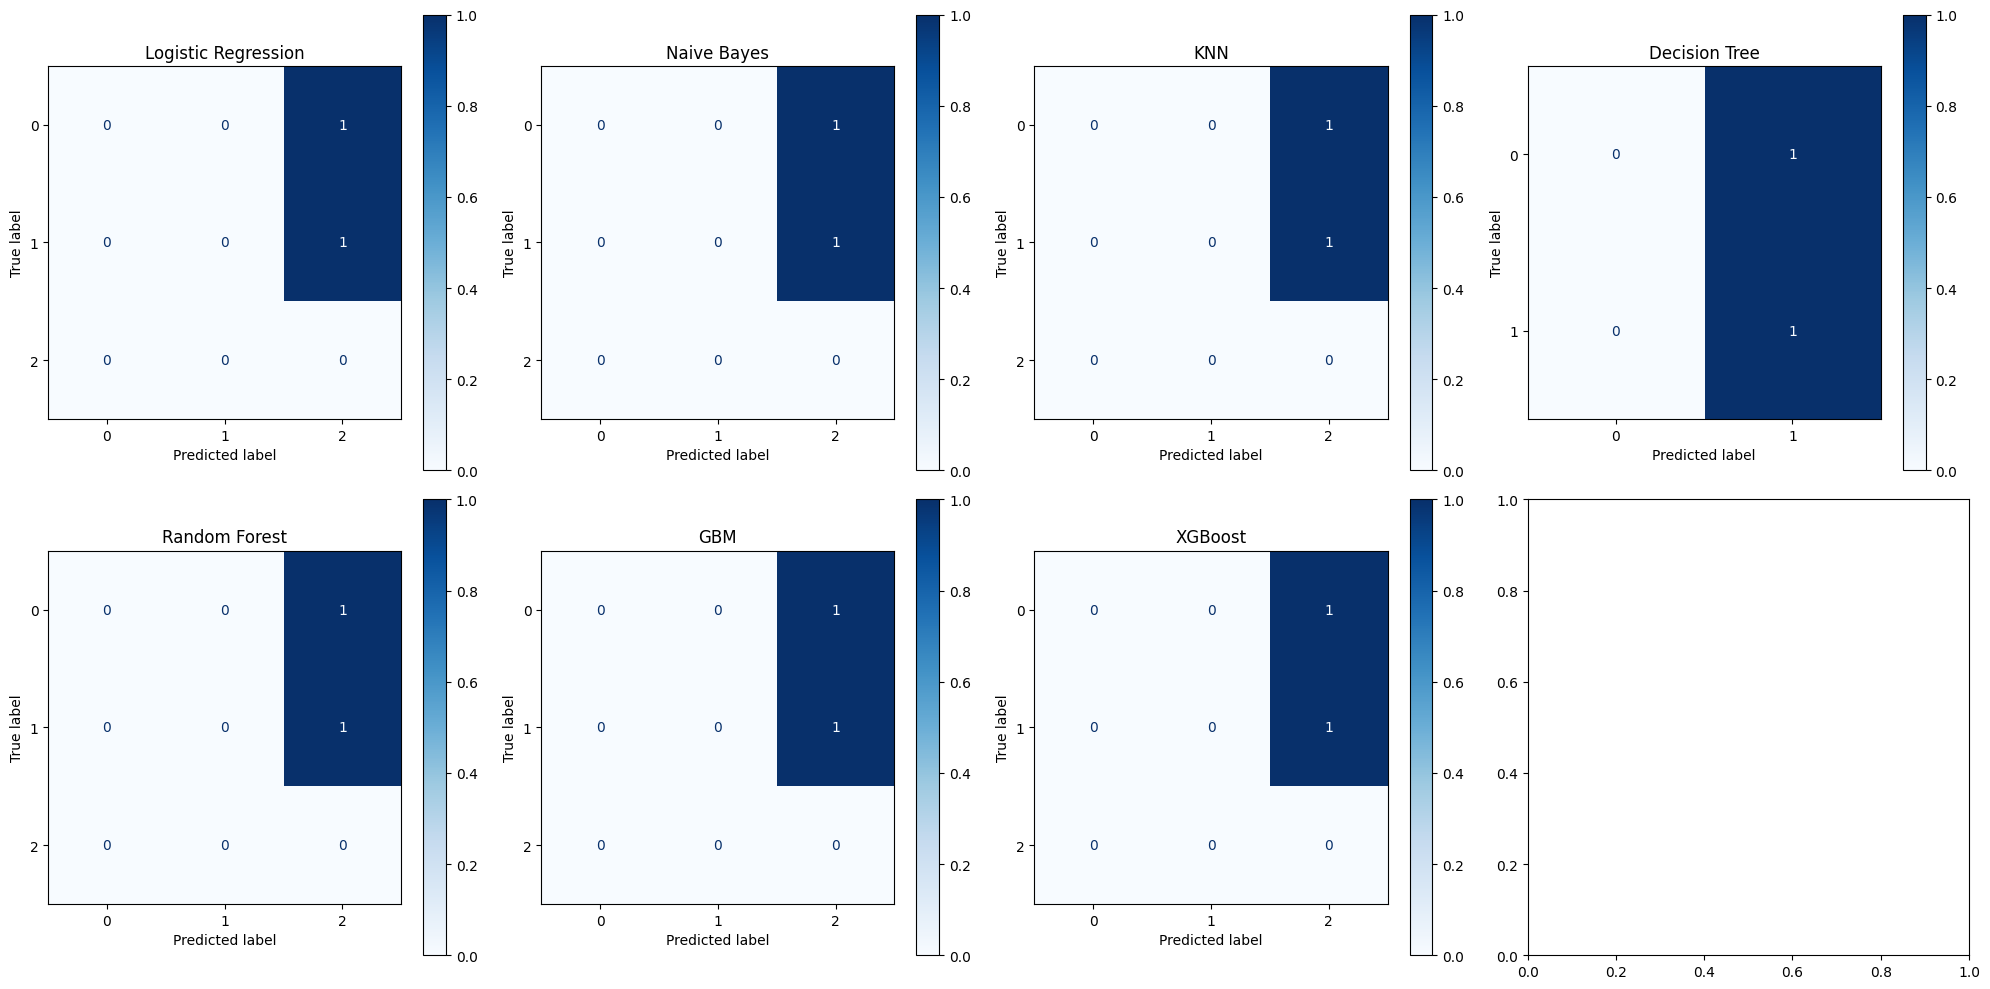

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ran

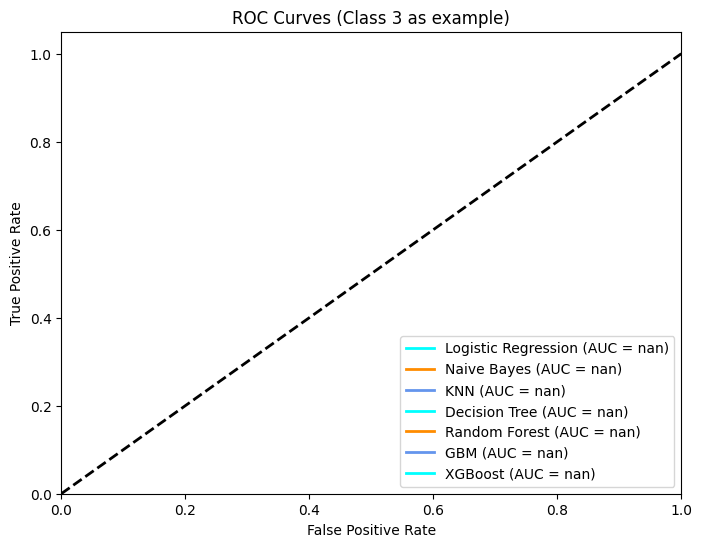

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive c

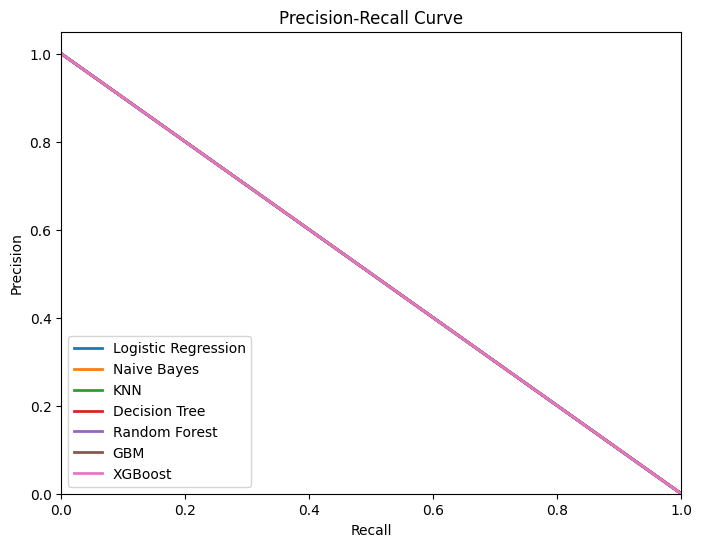

In [19]:
#8: Classification Evaluation Metrics and Plots
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For regression too

# Metrics function for classification
def eval_class(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1}

class_metrics = {}
for name, y_pred in class_results.items():
    metrics = eval_class(y_test_class, y_pred)
    class_metrics[name] = metrics
    print(f"\n{name} Metrics:\n{pd.DataFrame([metrics])}")

# Confusion Matrices (plot for one model as example; loop for all if needed)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()
for idx, (name, y_pred) in enumerate(class_results.items()):
    if idx < 7:  # Limit to 7 models
        disp = ConfusionMatrixDisplay(confusion_matrix(y_test_class, y_pred))
        disp.plot(ax=axes[idx], cmap='Blues')
        axes[idx].set_title(name)
plt.tight_layout()
plt.show()

# ROC Curves (one-vs-rest for multi-class)
y_test_bin = label_binarize(y_test_class, classes=[3,4,5])
n_classes = y_test_bin.shape[1]

fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for name, clf in classifiers.items():
    # Predict probabilities
    if hasattr(clf, 'predict_proba'):
        y_score = clf.predict_proba(X_test)
    else:  # For models without proba, skip or use decision_function if available
        y_score = clf.decision_function(X_test) if hasattr(clf, 'decision_function') else None
        if y_score is None:
            continue
    # Compute ROC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot for class 0 (e.g., label 3) as example; extend for all
    ax.plot(fpr[0], tpr[0], color=next(colors), lw=2, label=f'{name} (AUC = {roc_auc[0]:.2f})')
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves (Class 3 as example)')
ax.legend(loc="lower right")
plt.show()

# Precision-Recall Curves (similar setup)
fig, ax = plt.subplots(figsize=(8, 6))
for name, clf in classifiers.items():
    if hasattr(clf, 'predict_proba'):
        y_score = clf.predict_proba(X_test)
        prec, rec, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
        ax.plot(rec, prec, lw=2, label=name)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend(loc="lower left")
plt.show()


Linear Regression Metrics:
        MSE       MAE        R²
0  0.950836  0.827975 -2.803342

Decision Tree Reg Metrics:
   MSE  MAE   R²
0  0.5  0.5 -1.0

Random Forest Reg Metrics:
    MSE  MAE    R²
0  1.46  1.1 -4.84

Gradient Boosting Reg Metrics:
        MSE       MAE        R²
0  1.216204  0.982957 -3.864818

XGB Reg Metrics:
        MSE       MAE       R²
0  1.641045  1.179426 -5.56418


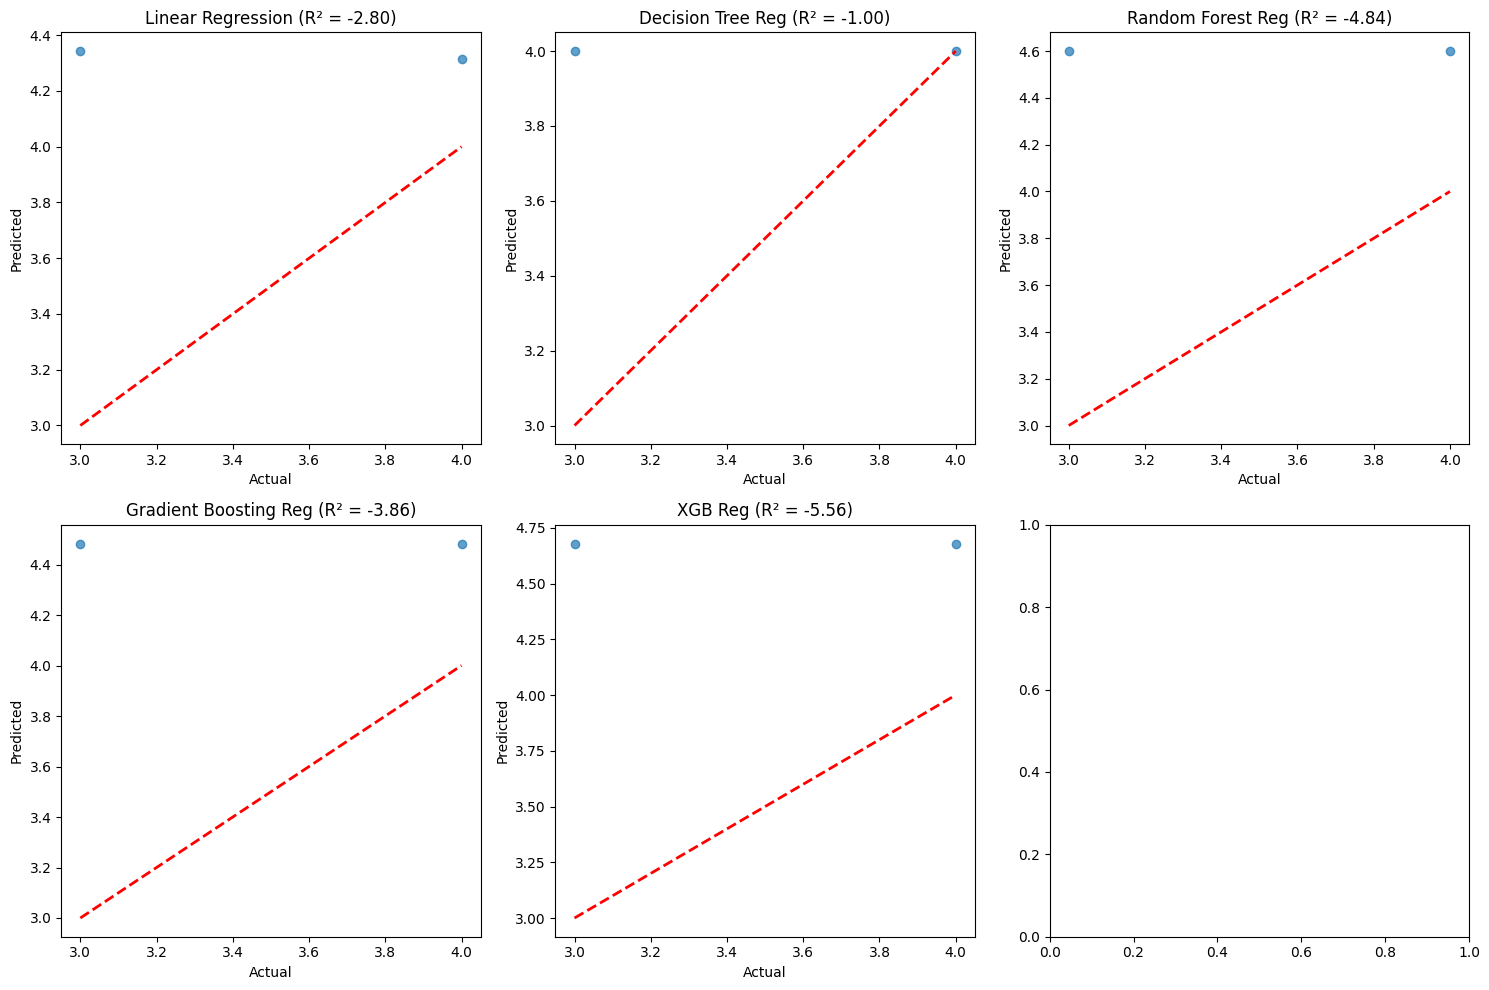

In [20]:
#9: Regression Evaluation Metrics and Plots
# Metrics function for regression
def eval_reg(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = 1 - (sum((y_true - y_pred)**2) / sum((y_true - np.mean(y_true))**2))  # R²
    return {'MSE': mse, 'MAE': mae, 'R²': r2}

reg_metrics = {}
for name, y_pred in reg_results.items():
    metrics = eval_reg(y_test_reg, y_pred)
    reg_metrics[name] = metrics
    print(f"\n{name} Metrics:\n{pd.DataFrame([metrics])}")

# Plot actual vs predicted for all regressors (subplots)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for idx, (name, y_pred) in enumerate(reg_results.items()):
    if idx < 6:  # Limit to 5 models
        axes[idx].scatter(y_test_reg, y_pred, alpha=0.7)
        axes[idx].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
        axes[idx].set_xlabel('Actual')
        axes[idx].set_ylabel('Predicted')
        axes[idx].set_title(f'{name} (R² = {reg_metrics[name]["R²"]:.2f})')
plt.tight_layout()
plt.show()